In [152]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('USA_full_data.csv')
df_final = pd.read_csv('full_data_sentiment.csv')

/Users/zhengyangxu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,10,11,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
def check_filter(data, name):
    if name in data:
        return 1
    else:
        return 0

In [175]:
def check_job(data):
    if 'job' in data:
        return 1
    elif 'hire' in data:
        return 1
    elif 'hiring' in data:
        return 1
    elif 'unemploy' in data:
        return 1
    else:
        return 0

In [184]:
def check_money(data):
    if 'unemployment benefits' in data:
        return 1
    else:
        return 0

In [111]:
df['text'].sample(n=10)

81452     My friends on social media #covid19 #quarantin...
141287    Only the poor man feel it🙏🏾⚰️\n\n“Payroll”💰Vis...
112226    Proof that I smile sometimes 😃\n•\n•\n•\n#bore...
63604     Thank you to all the health care workers!!!\n\...
19773     Examples of kindness. More please. #COVID19 ht...
65108     It’s 🥯 fact Friday! Ask me anything ⬇️ below \...
72506     President Trump: "Let me be extremely clear ab...
23868     “I have seen enough of both the governance of ...
25320     @SpiroAgnewGhost Yes and all that toxic junk f...
194       This just keep getting better and better. Wait...
Name: text, dtype: object

In [66]:
df_final['text'] = df_final['text'].astype(str)

In [69]:
df_final['stayhome'] = df_final['text'].apply(lambda x: check_filter(x,'stayhome'))

In [70]:
df_final['vaccine'] = df_final['text'].apply(lambda x: check_filter(x,'vaccine'))

In [71]:
df_final['quarantine'] = df_final['text'].apply(lambda x: check_filter(x,'quarantine'))

In [72]:
df_final['hiring'] = df_final['text'].apply(lambda x: check_filter(x,'hiring'))

In [85]:
df_final['trump'] = df_final['text'].apply(lambda x: check_filter(x,'trump'))

In [112]:
df_final['covid'] = df_final['text'].apply(lambda x: check_filter(x,'covid'))

In [176]:
df_final['jobs'] = df_final['text'].apply(lambda x: check_job(x))

In [187]:
df_final['money'] = df_final['text'].apply(lambda x: check_money(x))

In [52]:
df['text'].sample(n=10)

41224     Was at @PetSmart and saw another customer with...
43250     In light of PM Boris Johnson’s condition, this...
58432     😱 Airborne or not? 😯 #COVIDー19 #COVID #Covid_1...
59569     Even in this Coronavirus pandemic situation th...
30193     So I got bored and wrote a tweet thread. Yes i...
28753     Yay! @arimoin and @larrybrilliant on @cnn inte...
126448    28 chilly F degrees in Chicago, but Dexter lov...
110736    Stuck indoors because of the #coronavirus pand...
129333    New model to start working on. Looks like this...
112356    “It’s mentally taxing, it’s stressful.” Local ...
Name: text, dtype: object

#COVID19
#Covid19
#covid19
#StopTheSpread
#coronavirus
#LiberalismIsAMentalDisorder
#quarantunes
#Quarantine

#COVID2019
#needsomethingpositive


#StayHome
#stayhome
#StayStrong
#staysafe

#vaccine
#vaccines

#hiring

In [202]:
print(df_final[df_final['stayhome'] == 1]['sentiment'].mean())
df_final[df_final['stayhome'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

1.316568047337278


sentiment
2   0.516138
1   0.284293
0   0.199570

In [115]:
print(df_final[df_final['vaccine'] == 1]['sentiment'].mean())
df_final[df_final['vaccine'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

1.1808318264014466


sentiment
2   0.481917
0   0.301085
1   0.216998

In [117]:
print(df_final[df_final['quarantine'] == 1]['sentiment'].mean())
df_final[df_final['quarantine'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

1.2674629966242534


sentiment
2   0.463862
1   0.339739
0   0.196399

In [180]:
print(df_final[df_final['hiring'] == 1]['sentiment'].mean())
df_final[df_final['hiring'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

1.1066666666666667


sentiment
2   0.480000
0   0.373333
1   0.146667

In [181]:
print(df_final[df_final['jobs'] == 1]['sentiment'].mean())
df_final[df_final['jobs'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

0.8105810108644308


sentiment
0   0.544639
2   0.355220
1   0.100142

In [119]:
print(df_final[df_final['trump'] == 1]['sentiment'].mean())
df_final[df_final['trump'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

0.7845974119338606


sentiment
0   0.513210
2   0.297807
1   0.188983

In [200]:
print(round(df_final[df_final['covid'] == 1]['sentiment'].mean(),4))
df_final[df_final['covid'] == 1]['sentiment'].value_counts(normalize=True).to_frame()

1.2138


sentiment
2   0.490940
0   0.277174
1   0.231886

In [199]:
print(df_final[df_final['money'] == 1]['sentiment'].mean())
df_final[df_final['money'] == 1]['sentiment'].value_counts().to_frame()

0.45161290322580644


sentiment
0         48
2         14

In [146]:
df_final['created_at'] = df_final['created_at'].astype(str)
def trans_time(data):
    return data[:10]

df_final['created_at'] = df_final['created_at'].apply(lambda x: trans_time(x))

In [203]:
covid_trend = df_final[df_final['covid'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
trump_trend = df_final[df_final['trump'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
quarantine_trend = df_final[df_final['quarantine'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
jobs_trend = df_final[df_final['jobs'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
vaccine_trend = df_final[df_final['vaccine'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
money_trend = df_final[df_final['money'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()
stayhome_trend = df_final[df_final['stayhome'] == 1]['sentiment'].groupby(df_final['created_at']).mean().to_frame().reset_index()



In [232]:
stayhome_trend

created_at  sentiment
0   2020-03-29   1.280120
1   2020-03-30   1.314554
2   2020-03-31   1.299754
3   2020-04-01   1.314103
4   2020-04-02   1.372514
5   2020-04-03   1.329609
6   2020-04-04   1.251953
7   2020-04-05   1.291902
8   2020-04-06   1.384615
9   2020-04-07   1.377717
10  2020-04-08   1.364532
11  2020-04-09   1.333333
12  2020-04-10   1.357500
13  2020-04-11   1.347953
14  2020-04-12   1.518519
15  2020-04-13   1.396648
16  2020-04-14   1.272953
17  2020-04-15   1.308511
18  2020-04-16   1.332180
19  2020-04-17   1.318182
20  2020-04-18   1.332248
21  2020-04-19   1.290210
22  2020-04-20   1.341463
23  2020-04-21   1.260870
24  2020-04-22   1.282051
25  2020-04-23   1.311203
26  2020-04-24   1.362903
27  2020-04-25   1.280851
28  2020-04-26   1.130802
29  2020-04-27   1.225664
30  2020-04-28   1.161017
31  2020-04-29   1.235294
32  2020-04-30   1.331081

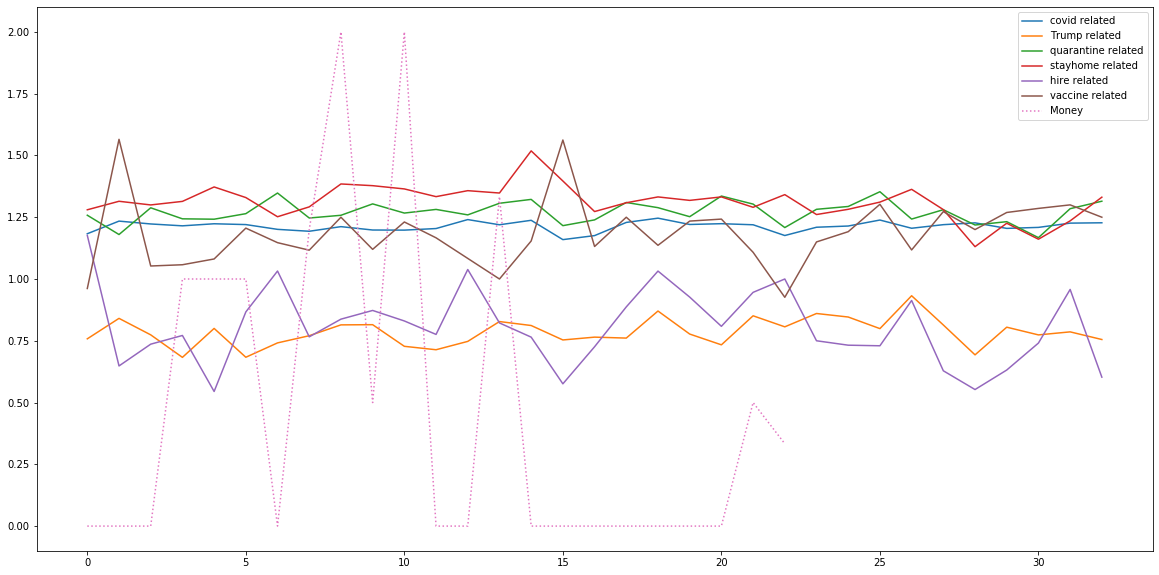

In [204]:
plt.figure(figsize=(20,10))
plt.plot(covid_trend['sentiment'])
plt.plot(trump_trend['sentiment'])
plt.plot(quarantine_trend['sentiment'])
plt.plot(stayhome_trend['sentiment'])
plt.plot(jobs_trend['sentiment'])
plt.plot(vaccine_trend['sentiment'])
plt.plot(money_trend['sentiment'], linestyle=':')
plt.legend(labels=['covid related','Trump related','quarantine related','stayhome related','hire related', 'vaccine related','Money'])
plt.show()

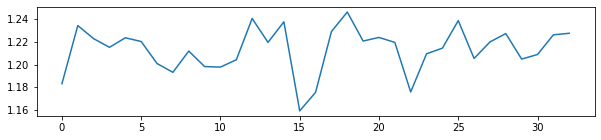

In [225]:
plt.figure(figsize=(10,2))
plt.plot(covid_trend['sentiment'])
# plt.ylim(1,1.3)
plt.savefig('covid_related.pdf')

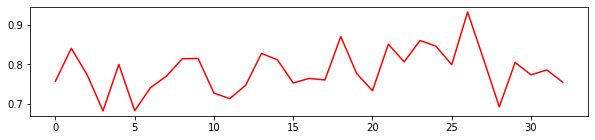

In [226]:
plt.figure(figsize=(10,2))
plt.plot(trump_trend['sentiment'],color='red')
plt.savefig('trump.pdf')

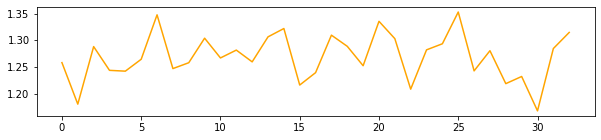

In [227]:
plt.figure(figsize=(10,2))
plt.plot(quarantine_trend['sentiment'],color='orange')
plt.savefig('quarantine.pdf')

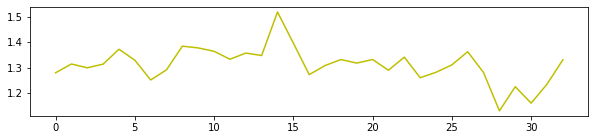

In [228]:
plt.figure(figsize=(10,2))
plt.plot(stayhome_trend['sentiment'],color='y')
plt.savefig('stayhome.pdf')

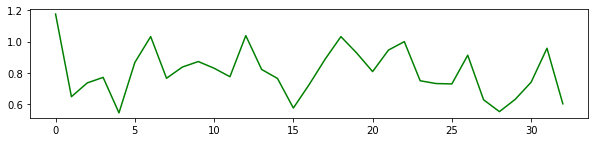

In [229]:
plt.figure(figsize=(10,2))
plt.plot(jobs_trend['sentiment'],color='g')
plt.savefig('jobs.pdf')

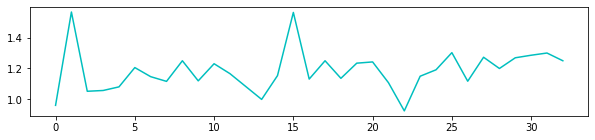

In [230]:
plt.figure(figsize=(10,2))
plt.plot(vaccine_trend['sentiment'],color='c')
plt.savefig('vaccine.pdf')

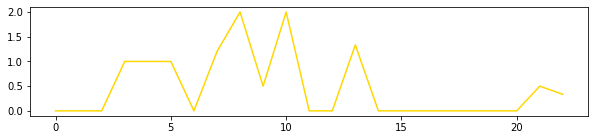

In [231]:
plt.figure(figsize=(10,2))
plt.plot(money_trend['sentiment'],color='gold')
plt.savefig('money.pdf')

In [123]:
import plotly.graph_objects as go

In [130]:
animals=['negative', 'neutral', 'positive']

fig = go.Figure(data=[
    go.Bar(name='stayhome', x=animals, y=[0.199570, 0.284293, 0.516138]),
    go.Bar(name='vaccine', x=animals, y=[0.301085, 0.216998, 0.481917]),
    go.Bar(name='quarantine', x=animals, y=[0.196399, 0.339739, 0.463862]),
    go.Bar(name='hiring', x=animals, y=[0.373333, 0.146667, 0.480000]),
    go.Bar(name='trump', x=animals, y=[0.513210, 0.188983, 0.297807]),
    go.Bar(name='covid', x=animals, y=[0.277174, 0.231886, 0.490940])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()